In [2]:
% matplotlib inline
% load_ext autoreload
% autoreload 2

In [3]:
from __future__ import print_function
import tensorflow as tf
import numpy as np
from deep_visual_odometry.kitti_utils import KITTIdata
from matplotlib import pyplot as plt

In [4]:
basedir = 'dataset'
kitti_data = KITTIdata(basedir, sequences = ['00','01'], img_size=(150,50))

completed load sequence 00 data
completed load sequence 01 data


In [5]:
inputs, velocities = kitti_data.load_data_input_model()

In [6]:
np.random.seed(100)
mask = np.arange(inputs.shape[0])
np.random.shuffle(mask)
inputs = inputs[mask]
velocities = velocities[mask]
num_validation = int(inputs.shape[0]/10)
num_training = inputs.shape[0] - num_validation

X_train, y_train = inputs[:num_training], velocities[:num_training]
X_val, y_val = inputs[num_training:], velocities[num_training:]

mean_image = np.mean(X_train, axis = 0)
std_image = np.std(X_train, axis = 0)


X_train = X_train.astype(np.float32) - mean_image.astype(np.float32)
X_val = X_val.astype(np.float32) - mean_image.astype(np.float32)

X_train /= 255
X_val /= 255

'''
mean_y = np.mean(y_train, axis = 0)
std_y = np.std(y_train, axis = 0)

y_train = y_train - mean_y
y_val = y_val - mean_y

y_train /= std_y
y_val /=std_y
'''

print(X_train.shape)
print(y_train.shape)
print(type(y_train[0,0]))
print(X_val.shape)
print(y_val.shape)

(5076, 50, 150, 6)
(5076, 2)
<class 'numpy.float64'>
(564, 50, 150, 6)
(564, 2)


In [7]:
from deep_visual_odometry.input_model import training
tf.reset_default_graph()
training(X_train, y_train, X_val, y_val, 
         conv_featmap=[16,16,16,16],
         fc_units=[128,128],
         conv_kernel_size=[7,5,5,5],
         pooling_size=[2,2,2,2],
         l2_norm=0.01,
         seed=235,
         learning_rate=1e-2,
         epoch=20,
         batch_size=25,
         verbose=False,
         pre_trained_model=None)

Building velocity CNN. Parameters: 
conv_featmap=[16, 16, 16, 16]
fc_units=[128, 128]
conv_kernel_size=[7, 5, 5, 5]
pooling_size=[2, 2, 2, 2]
l2_norm=0.01
seed=235
learning_rate=0.01
number of batches for training: 203
epoch 1 
Best validation mse! iteration:100 val_mse: 0.07255793362855911
Best validation mse! iteration:200 val_mse: 0.05407347157597542
epoch 2 
Best validation mse! iteration:300 val_mse: 0.04877995327115059
Best validation mse! iteration:400 val_mse: 0.0479852631688118
epoch 3 
Best validation mse! iteration:500 val_mse: 0.04789538308978081
epoch 4 
epoch 5 
Best validation mse! iteration:1000 val_mse: 0.044242013245821
epoch 6 
epoch 7 
Best validation mse! iteration:1300 val_mse: 0.04119632765650749
epoch 8 
epoch 9 
epoch 10 
Best validation mse! iteration:2000 val_mse: 0.03948512300848961
epoch 11 
epoch 12 
Best validation mse! iteration:2400 val_mse: 0.03889383748173714
epoch 13 
epoch 14 
epoch 15 
epoch 16 
Best validation mse! iteration:3200 val_mse: 0.038396

In [8]:
from deep_visual_odometry.input_model import test_input_model
print(X_val[20:21].shape)
out = test_input_model("CNN_Velocity_Model",X_val[20:21],y_val[20:21])
print(out)
print(y_val[20:21])

(1, 50, 150, 6)
INFO:tensorflow:Restoring parameters from model/CNN_Velocity_Model
[[ 1.2058694 -1.0440965]]
[[ 1.24424559e+00 -1.02351398e-04]]


In [9]:
out = test_input_model("CNN_Velocity_Model",X_val,y_val)

INFO:tensorflow:Restoring parameters from model/CNN_Velocity_Model


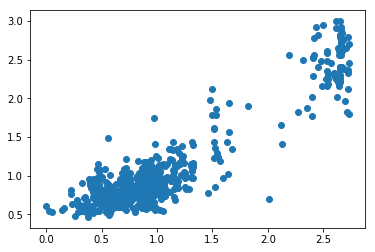

In [10]:
plt.scatter(y_val[:,0],out[:,0])
plt.show()

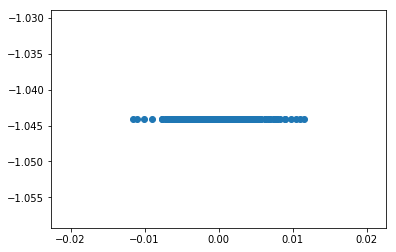

In [11]:
plt.scatter(y_val[:,1],out[:,1])
plt.show()

In [12]:
out[:,1]

array([-1.0440965, -1.0440965, -1.0440965, -1.0440965, -1.0440965,
       -1.0440965, -1.0440965, -1.0440964, -1.0440965, -1.0440965,
       -1.0440965, -1.0440965, -1.0440964, -1.0440965, -1.0440965,
       -1.0440964, -1.0440965, -1.0440965, -1.0440965, -1.0440965,
       -1.0440965, -1.0440965, -1.0440965, -1.0440965, -1.0440965,
       -1.0440965, -1.0440965, -1.0440965, -1.0440965, -1.0440965,
       -1.0440965, -1.0440965, -1.0440965, -1.0440964, -1.0440965,
       -1.0440965, -1.0440965, -1.0440965, -1.0440965, -1.0440965,
       -1.0440965, -1.0440965, -1.0440965, -1.0440965, -1.0440965,
       -1.0440964, -1.0440965, -1.0440965, -1.0440965, -1.0440965,
       -1.0440965, -1.0440964, -1.0440965, -1.0440965, -1.0440965,
       -1.0440965, -1.0440965, -1.0440965, -1.0440964, -1.0440965,
       -1.0440965, -1.0440965, -1.0440964, -1.0440965, -1.0440965,
       -1.0440965, -1.0440965, -1.0440965, -1.0440965, -1.0440965,
       -1.0440964, -1.0440965, -1.0440965, -1.0440965, -1.0440